## Aproksymacja 

Jako źródło danych proszę wykorzystać te same funkcje i te same zbiory danych jakie były używane w ćwiczeniach dotyczących interpolacji. 
Dodatkowo jako dodatkowe źródło danych proszę wykorzystać publicznie dostępne dane o koronawirusie (active cases):
https://github.com/CSSEGISandData/COVID-19 
Kraj proszę wybrać samodzielnie. Celem tego zadania będzie więc określenie funkcji nalepiej przybliżającej wzrost zachorowań. 


### Zadanie 1 Aproksymacja średniokwadratowa (Least-squares polynomial approximation)
Proszę samodzielnie zaimplementować algorytm aproksymacji wielomianowej średniokwadratowej.  
Dla wszystkich zbiorów danych proszę wykonać odpowiednie wykresy oraz oszacować błąd aproksymacji. 
Testy przeprowadzić dla stopni wielomianów od 1 (regresja liniowa) do n-1. 
Proszę zwięźle podsumować wyniki i podać wnioski co do wyboru najlepszych parametrów aproksymacji. 

In [25]:
import math as m
import numpy as np
from sympy.polys.domains import domain
from tabulate import tabulate
import matplotlib.pyplot as plt
import sympy as sp

def get_table(min, max, number_of_points, func, func_name):
    step = (max - min) / number_of_points
    table = []
    x_values = []
    y_values = []
    for i in np.arange(min, max+step, step):
        table.append([i, func(i)])
        x_values.append(i)
        y_values.append(func(i))
    # print(tabulate(table, headers=["x", func_name], tablefmt="grid", floatfmt=".10f"))
    return x_values, y_values, tabulate(table, headers=["x", func_name], tablefmt="grid",
                                        floatfmt=".10f")
def draw_diagram(min, max, num_of_point, func1, func2, func_name, newton_polynomial):
    x_array = []
    func1_array = []
    func2_array = []
    step = (max - min) / num_of_point
    for i in np.arange(min, max+step, step):
        x_array.append(i)
        func1_array.append(func1(newton_polynomial, i))
        func2_array.append(func2(i))

    plt.plot(x_array, func1_array, label="Interpolation "+func_name)
    plt.plot(x_array, func2_array, label=func_name)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title(func_name)
    plt.legend()
    plt.show()

def compare(min, max, number_of_points, fun1, poly_calc, polynomial, fun_name, rel_errors, abs_errors):
    table = []
    step = (max - min) / number_of_points
    for x in np.arange(min + (step / 2), max + (step / 2), step):
        table.append([x, fun1(x), poly_calc(polynomial, x),
                      abs(poly_calc(polynomial, x) - fun1(x)) / fun1(x),
                      abs(poly_calc(polynomial, x) - fun1(x))])
        rel_errors.append(abs(poly_calc(polynomial, x) - fun1(x)) / fun1(x))
        abs_errors.append(abs(poly_calc(polynomial, x) - fun1(x)))
    print(tabulate(table, headers=["x", fun_name, "Interpolation of " + fun_name, "Relative error", "Absolute error"],
                   tablefmt="grid", floatfmt=".10f"))



def get_value(f, x):
    X = sp.symbols("x")
    return f.evalf(subs={X: x})


def get_coefficients(x_array, y_array):
    n = len(x_array)
    a = np.copy(y_array)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = float(a[i] - a[i-1]) / float(x_array[i] - x_array[i-j])
    return np.array(a)


def get_newton_polynomial(coeffs, x):
    X = sp.symbols("x")
    n = len(coeffs)
    res = 0
    for i in range(n):
        part = 1
        for j in range(i):
            part *= (X - x[j])
        res += part * coeffs[i]
    return sp.simplify(res)


def comparison0(min, max, n, relative_er, abs_er):
    x_sqrt, y_sqrt, sqrt_tab1 = get_table(min, max, n, m.sqrt, "sqrt(x)")
    x_sin, y_sin, sin_tab1 = get_table(min, max, n, m.sin, "sin(x)")
    f = lambda x: x ** 3 + 2 * x
    x_f, y_f, f_tab1 = get_table(min, max, n, f, "x^3 + 2x")
        
    sqrt_coeffs = get_coefficients(x_sqrt, y_sqrt)
    sin_coefs = get_coefficients(x_sin, y_sin)
    f_coefs = get_coefficients(x_f, y_f)
    
    sqrt_approx = get_newton_polynomial(sqrt_coeffs, x_sqrt)
    sin_approx = get_newton_polynomial(sin_coefs, x_sin)
    f_approx = get_newton_polynomial(f_coefs, x_f)

    print(sqrt_tab1)
    compare(min, max, n, m.sqrt, get_value, sqrt_approx, "sqrt(x)", relative_er, abs_er)


    print(sin_tab1)
    compare(min, max, n, m.sin, get_value, sin_approx, "sin(x)", relative_er, abs_er)


    print(f_tab1)
    compare(min, max, n, f, get_value, f_approx, "x^3 + 2x", relative_er, abs_er)
    
    draw_diagram(min, max, 10000, get_value, np.math.sqrt, "sqrt", get_newton_polynomial(sqrt_coeffs, x_sqrt))
    draw_diagram(min, max, 10000, get_value, np.math.sin, "sin", get_newton_polynomial(sin_coefs, x_sin))
    draw_diagram(min, max, 10000, get_value, f, "f", get_newton_polynomial(f_coefs, x_f))

In [26]:
newton_rel_errors = []
newton_abs_errors = []

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 2.5000000000 | 1.5811388301 |               1.2817662756 |     0.1893398282 |     0.2993725545 |
+--------------+--------------+----------------------------+------------------+------------------+
| 7.5000000000 | 2.7386127875 |               2.8629051057 |     0.0453851376 |     0.1242923182 |
+--------------+--------------+----------------------------+------------------+------------------+
+---------

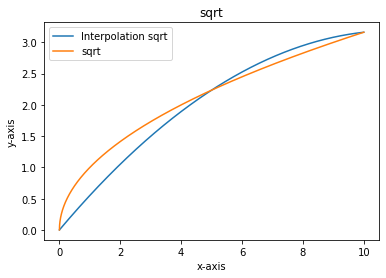

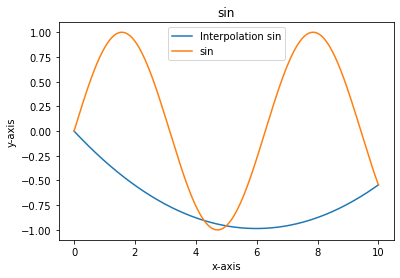

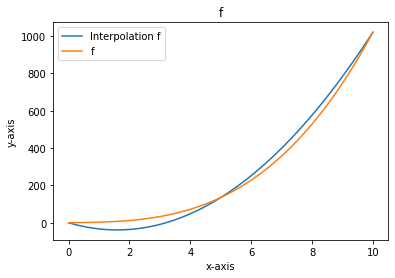

In [27]:
comparison0(0, 10, 2, newton_rel_errors, newton_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  3.3333333333 | 1.8257418584 |
+---------------+--------------+
|  6.6666666667 | 2.5819888975 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 1.6666666667 | 1.2909944487 |               1.1024038155 |     0.1460816764 |     0.1885906332 |
+--------------+--------------+----------------------------+------------------+------------------+
| 5.0000000000 | 2.2360679775 |               2.2817061964 |     0.0204100320 |     0.0456382189 |
+--------------+--------------+------------

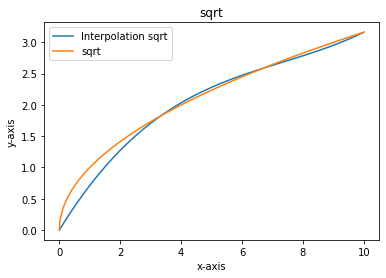

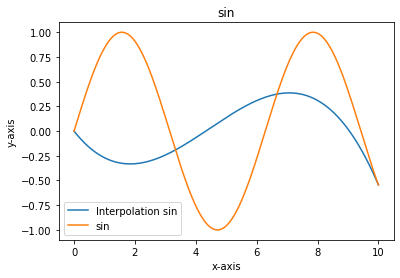

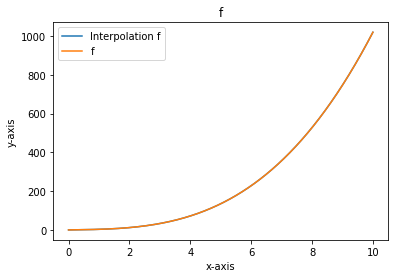

In [28]:
comparison0(0, 10, 3, newton_rel_errors, newton_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  2.5000000000 | 1.5811388301 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
|  7.5000000000 | 2.7386127875 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 1.2500000000 | 1.1180339887 |               0.9820659964 |     0.1216134695 |     0.1359679924 |
+--------------+--------------+----------------------------+------------------+------------------+
| 3.7500000000 | 1.9364916731 |               1.9596017579 |     0.011933996

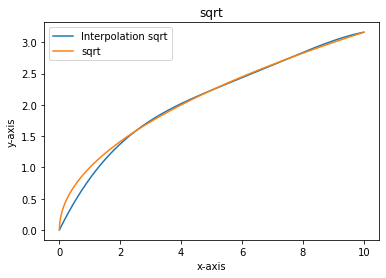

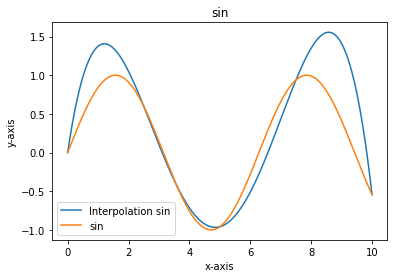

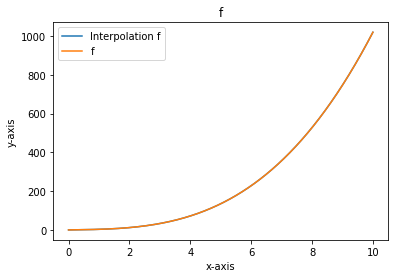

In [29]:
comparison0(0, 10, 4, newton_rel_errors, newton_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  1.4285714286 | 1.1952286093 |
+---------------+--------------+
|  2.8571428571 | 1.6903085095 |
+---------------+--------------+
|  4.2857142857 | 2.0701966780 |
+---------------+--------------+
|  5.7142857143 | 2.3904572187 |
+---------------+--------------+
|  7.1428571429 | 2.6726124191 |
+---------------+--------------+
|  8.5714285714 | 2.9277002188 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 0.7142857143 | 0.8451542547 |               0.7729116136 |     0.085478645

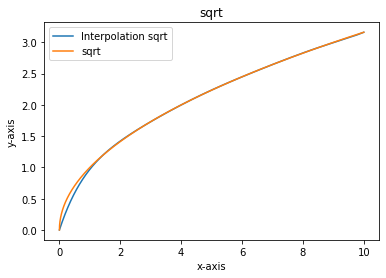

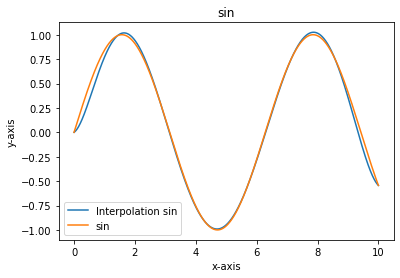

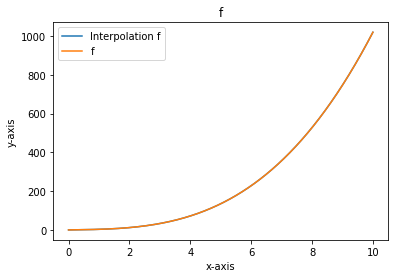

In [30]:
comparison0(0, 10, 7, newton_rel_errors, newton_abs_errors)

##### Zadanie 1a (dla chętnych)
Proszę zwrócić uwagę na dane wygenerowane przez funkcję trygonometryczną i wynik ich aproksymacji. Proszę spróbować zastosować aproksymację środniokwadratową funkcjami trygonometrycznymi. 

### Zadanie 2 Aproksymacja średniokwadratowa w Python (numpy, scipy)
Proszę znaleźć i wykorzystać do aproksymacji tych samych danych funkcje dostępne w bibliotekach numerycznych Python. 

In [31]:
def get_hermite_polynomial(x, y):
  if len(x) != len(y):
    return None
  n = len(x)
  multiplicity = [0] * n

  for i in range(1, n):
    if x[i] == x[i - 1]:
      multiplicity[i] = multiplicity[i - 1] + 1
    else:
      multiplicity[i] = 0

  for i in range(1, n):
    for j in range(n - 1, i - 1, -1):
      if multiplicity[j] == 0:
        y[j] = (y[j] - y[j - 1 - multiplicity[j - 1]]) / (x[j] - x[j - i])
      else:
        y[j] /= i
        multiplicity[j] -= 1

  X = sp.symbols('x')
  polynomial = 0
  for i in range(n):
      value = y[i]
      for j in range(i):
          value *= (X - x[j])
      polynomial += value

  return sp.simplify(polynomial)


def comparison1(min, max, n, relative_er, abs_er):
    x_sqrt, y_sqrt, sqrt_tab1 = get_table(min, max, n, m.sqrt, "sqrt(x)")
    x_sin, y_sin, sin_tab1 = get_table(min, max, n, m.sin, "sin(x)")
    f = lambda x: x ** 3 + 2 * x
    x_f, y_f, f_tab1 = get_table(min, max, n, f, "x^3 + 2x")
        
    sqrt_coeffs = get_coefficients(x_sqrt, y_sqrt)
    sin_coefs = get_coefficients(x_sin, y_sin)
    f_coefs = get_coefficients(x_f, y_f)
    
    sqrt_approx = get_hermite_polynomial(sqrt_coeffs, x_sqrt)
    sin_approx = get_hermite_polynomial(sin_coefs, x_sin)
    f_approx = get_hermite_polynomial(f_coefs, x_f)

    print(sqrt_tab1)
    compare(min, max, n, m.sqrt, get_value, sqrt_approx, "sqrt(x)", relative_er, abs_er)


    print(sin_tab1)
    compare(min, max, n, m.sin, get_value, sin_approx, "sin(x)", relative_er, abs_er)


    print(f_tab1)
    compare(min, max, n, f, get_value, f_approx, "x^3 + 2x", relative_er, abs_er)
    
    draw_diagram(min, max, 10000, get_value, np.math.sqrt, "sqrt", get_newton_polynomial(sqrt_coeffs, x_sqrt))
    draw_diagram(min, max, 10000, get_value, np.math.sin, "sin", get_newton_polynomial(sin_coefs, x_sin))
    draw_diagram(min, max, 10000, get_value, f, "f", get_newton_polynomial(f_coefs, x_f))

In [32]:
hermite_rel_errors = []
hermite_abs_errors = []

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 2.5000000000 | 1.5811388301 |            4287.1583882037 |  2710.4370393240 |  4285.5772493736 |
+--------------+--------------+----------------------------+------------------+------------------+
| 7.5000000000 | 2.7386127875 |           43984.1058178641 | 16059.7246187589 | 43981.3672050766 |
+--------------+--------------+----------------------------+------------------+------------------+
+---------

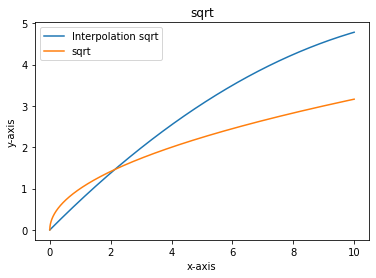

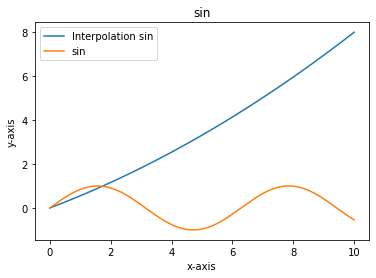

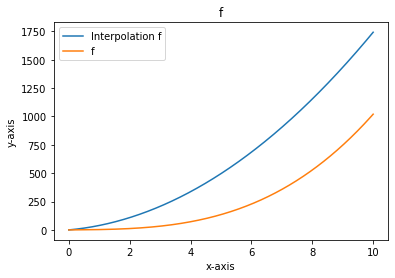

In [33]:
comparison1(0, 10, 2, hermite_rel_errors, hermite_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  3.3333333333 | 1.8257418584 |
+---------------+--------------+
|  6.6666666667 | 2.5819888975 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+---------------------+---------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |      Relative error |      Absolute error |
+==============+==============+============================+=====================+=====================+
| 1.6666666667 | 1.2909944487 |         -294241.0859007261 |   227919.1650926996 |   294242.3768951748 |
+--------------+--------------+----------------------------+---------------------+---------------------+
| 5.0000000000 | 2.2360679775 |       -10350737.8537600078 |  4628991.6916575301 | 10350740.0898279846 |
+------

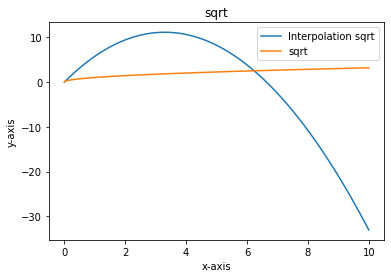

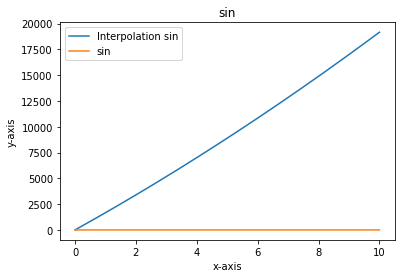

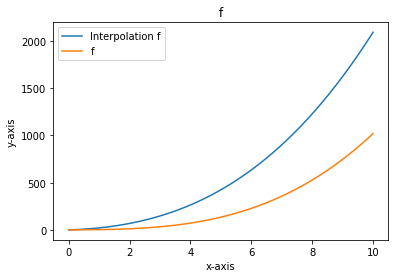

In [34]:
comparison1(0, 10, 3, hermite_rel_errors, hermite_abs_errors)

/home/jasiek/Desktop/Mownit/MownitCourse/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  2.5000000000 | 1.5811388301 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
|  7.5000000000 | 2.7386127875 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------------+-------------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |         Relative error |          Absolute error |
+==============+==============+============================+========================+=========================+
| 1.2500000000 | 1.1180339887 |       -43132662.2130523771 |    38579026.9035686553 |     43132663.3310863674 |
+--------------+--------------+----------------------------+------------------------+-------------------------+
| 3.7500000

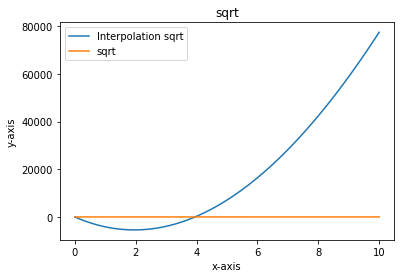

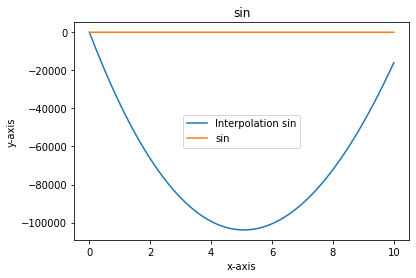

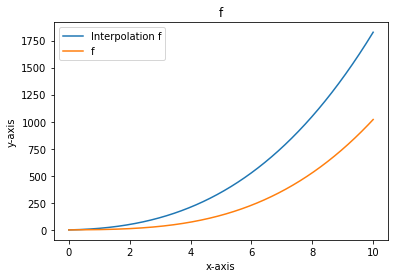

In [35]:
comparison1(0, 10, 4, hermite_rel_errors, hermite_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  1.4285714286 | 1.1952286093 |
+---------------+--------------+
|  2.8571428571 | 1.6903085095 |
+---------------+--------------+
|  4.2857142857 | 2.0701966780 |
+---------------+--------------+
|  5.7142857143 | 2.3904572187 |
+---------------+--------------+
|  7.1428571429 | 2.6726124191 |
+---------------+--------------+
|  8.5714285714 | 2.9277002188 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+---------------------------------------+--------------------------------------+--------------------------------------+
|            x |      sqrt(x) |              Interpolation of sqrt(x) |                       Relative error |                       Absolute error |
+==============+==============+=======================================+==

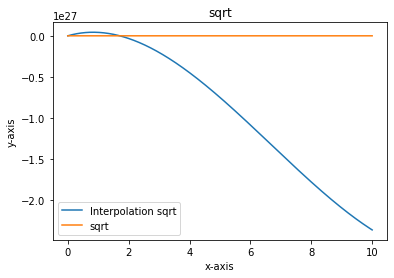

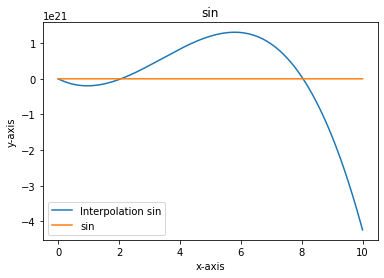

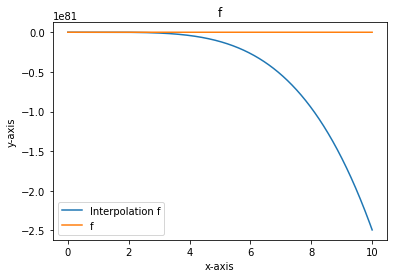

In [36]:
comparison1(0, 10, 7, hermite_rel_errors, hermite_abs_errors)